## **1. Import libraries**

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

## **2. Load the data set**

In [7]:
df = pd.read_csv('acetylcholinesterase_pIC50_pubchem_fp.csv')
df1=pd.read_csv('acetylcholinesterase_pIC50_pubchem_fp_revised.csv')
df1

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50,class
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.124939,active
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.000000,active
2,2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.301030,inactive
3,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.522879,active
4,4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.096910,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,4690,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.612610,intermediate
4691,4691,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.595166,intermediate
4692,4692,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.419075,intermediate
4693,4693,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.460924,intermediate


## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [8]:
X = df.drop('pIC50', axis=1)

x1=df1.drop('class',axis=1)
x1

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.000000
2,2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.301030
3,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.522879
4,4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,4690,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.612610
4691,4691,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.595166
4692,4692,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.419075
4693,4693,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.460924


### **3.2. Output features**

In [9]:
Y = df.pIC50

dict={'class' : 'bioactivity_class'}#previously changed class: bio_class and again changed bio_class: biaoactivity_class; dont get confused
df1.rename(columns=dict,inplace= True)
df1
Y1=df1.bioactivity_class
Y1

0             active
1             active
2           inactive
3             active
4             active
            ...     
4690    intermediate
4691    intermediate
4692    intermediate
4693    intermediate
4694    intermediate
Name: bioactivity_class, Length: 4695, dtype: object

### **3.3. Let's examine the data dimension**

In [10]:
X.shape
x1.shape

(4695, 883)

In [11]:
Y.shape
Y1.shape

(4695,)

### **3.4. Remove low variance features**

In [12]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
x1=selection.fit_transform(x1)

In [13]:
X.shape
x1.shape

(4695, 139)

## **4. Data split (80/20 ratio)**

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
x1_train,x1_test,Y1_train,Y1_test= train_test_split(x1,Y1,test_size=0.2)

In [15]:
X_train.shape, Y_train.shape
x1_train.shape, Y1_train.shape

((3756, 139), (3756,))

In [16]:
X_test.shape, Y_test.shape
x1_test.shape,Y1_test.shape

((939, 139), (939,))

## **5. Building a Regression Model using Random Forest**

In [17]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)# applying random forest on revised one is directly not possible because it predicts float number
model1=LogisticRegression()
model1.fit(x1_train,Y1_train)#applying logistics on revised one
r2 = model.score(X_test, Y_test)
r21=model1.score(x1_test,Y1_test)
r2
r21

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.6613418530351438

In [18]:
Y_pred = model.predict(X_test)
Y1_pred=model1.predict(x1_test)
Y1_pred #prediction of multinomila logistic regression

array(['intermediate', 'inactive', 'active', 'intermediate', 'active',
       'inactive', 'active', 'intermediate', 'active', 'inactive',
       'intermediate', 'active', 'intermediate', 'active', 'inactive',
       'active', 'active', 'active', 'intermediate', 'intermediate',
       'inactive', 'active', 'inactive', 'inactive', 'inactive',
       'inactive', 'intermediate', 'intermediate', 'active', 'active',
       'active', 'inactive', 'inactive', 'inactive', 'active', 'active',
       'inactive', 'active', 'inactive', 'active', 'inactive',
       'intermediate', 'active', 'active', 'active', 'active', 'inactive',
       'active', 'active', 'inactive', 'active', 'intermediate',
       'intermediate', 'active', 'inactive', 'active', 'inactive',
       'active', 'inactive', 'intermediate', 'intermediate', 'active',
       'active', 'active', 'inactive', 'active', 'active', 'inactive',
       'inactive', 'intermediate', 'active', 'active', 'active', 'active',
       'active', 'inactive

In [19]:
#storing class according to predicted PIc50 values by random forest
Y_pred
Y_pred_RF_class=[]
for i in Y_pred:

  a=float(i)*-1
  a=10**a
  a=a*(10**9)
  if float(a)>=10000:
    Y_pred_RF_class.append("inactive")
  elif float(a)<=1000:
    Y_pred_RF_class.append("active")
  else:
    Y_pred_RF_class.append("intermediate")
Y_pred_RF_class


['active',
 'intermediate',
 'active',
 'inactive',
 'inactive',
 'intermediate',
 'active',
 'intermediate',
 'intermediate',
 'active',
 'intermediate',
 'active',
 'active',
 'inactive',
 'active',
 'active',
 'inactive',
 'intermediate',
 'intermediate',
 'active',
 'active',
 'active',
 'inactive',
 'intermediate',
 'inactive',
 'active',
 'active',
 'active',
 'active',
 'active',
 'intermediate',
 'intermediate',
 'intermediate',
 'intermediate',
 'active',
 'active',
 'inactive',
 'active',
 'intermediate',
 'active',
 'inactive',
 'active',
 'intermediate',
 'inactive',
 'active',
 'active',
 'active',
 'inactive',
 'intermediate',
 'intermediate',
 'active',
 'active',
 'active',
 'intermediate',
 'intermediate',
 'inactive',
 'intermediate',
 'active',
 'intermediate',
 'active',
 'active',
 'intermediate',
 'intermediate',
 'intermediate',
 'intermediate',
 'intermediate',
 'intermediate',
 'intermediate',
 'active',
 'intermediate',
 'intermediate',
 'intermediate',
 'acti

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

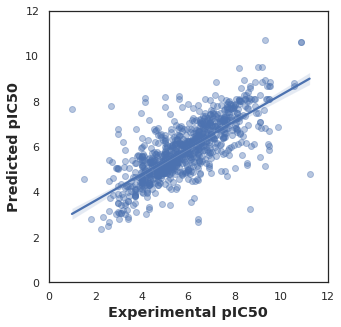

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [ ]:
plt.figure(figsize=(12,10))
cor =df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

**Instaling lazypredictor library to predict various supervised algorithms**

In [21]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Faeture engineering START

In [22]:
df1.corr()

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
Unnamed: 0,1.000000,0.018878,0.030551,0.052926,0.015499,NaN,NaN,NaN,NaN,NaN,...,0.010578,NaN,NaN,0.061981,NaN,NaN,NaN,NaN,NaN,-0.068617
PubchemFP0,0.018878,1.000000,0.182009,0.043202,0.009258,NaN,NaN,NaN,NaN,NaN,...,0.000369,NaN,NaN,0.000739,NaN,NaN,NaN,NaN,NaN,-0.005634
PubchemFP1,0.030551,0.182009,1.000000,0.237361,0.050866,NaN,NaN,NaN,NaN,NaN,...,0.002028,NaN,NaN,0.004059,NaN,NaN,NaN,NaN,NaN,0.048726
PubchemFP2,0.052926,0.043202,0.237361,1.000000,0.214297,NaN,NaN,NaN,NaN,NaN,...,0.008543,NaN,NaN,-0.010720,NaN,NaN,NaN,NaN,NaN,0.127041
PubchemFP3,0.015499,0.009258,0.050866,0.214297,1.000000,NaN,NaN,NaN,NaN,NaN,...,-0.016039,NaN,NaN,-0.032108,NaN,NaN,NaN,NaN,NaN,0.189533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PubchemFP877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
x1train= pd.DataFrame(x1_train)
x1train.corr()

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,1.000000,0.008251,-0.024200,0.026598,0.085486,0.118515,-0.143266,-0.076703,-0.119311,0.218622,...,-0.013405,0.104428,0.114874,0.034209,0.139999,-0.018903,0.068611,0.105410,0.037721,-0.074314
1,0.008251,1.000000,0.095766,0.224010,0.084470,0.194981,-0.033765,-0.110431,-0.069348,-0.006195,...,-0.008417,-0.073445,0.116694,0.099597,0.058204,0.021426,0.065866,0.155338,0.071094,0.175421
2,-0.024200,0.095766,1.000000,0.283832,-0.156133,-0.195088,0.045787,0.275185,0.125439,0.228513,...,-0.132267,-0.062025,-0.165736,0.292887,-0.319689,-0.169807,-0.106391,-0.221200,0.319048,0.101947
3,0.026598,0.224010,0.283832,1.000000,-0.137456,0.009182,0.012883,0.149378,0.102195,0.185923,...,-0.252345,-0.131441,-0.124021,0.159920,-0.232897,-0.265649,-0.158647,-0.141673,0.134363,0.095614
4,0.085486,0.084470,-0.156133,-0.137456,1.000000,0.378085,0.107226,-0.006694,0.067719,-0.249354,...,0.362011,0.136647,0.252750,-0.191431,0.402887,0.374923,0.084998,0.269688,-0.199026,-0.015503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,-0.018903,0.021426,-0.169807,-0.265649,0.374923,0.197816,0.119266,-0.022538,0.057299,-0.107237,...,0.970053,0.288625,0.120123,0.024955,0.508696,1.000000,0.239775,0.159649,-0.008524,0.057463
135,0.068611,0.065866,-0.106391,-0.158647,0.084998,0.059405,0.175322,-0.076809,-0.100583,-0.040882,...,0.198730,0.833170,-0.028385,-0.117700,0.204021,0.239775,1.000000,0.030366,-0.067479,0.026579
136,0.105410,0.155338,-0.221200,-0.141673,0.269688,0.380287,-0.171602,-0.211390,-0.120561,-0.153914,...,0.113982,0.006760,0.953574,-0.145181,0.266497,0.159649,0.030366,1.000000,-0.165798,0.047703
137,0.037721,0.071094,0.319048,0.134363,-0.199026,-0.157524,0.030545,0.187545,0.119318,0.340133,...,0.004846,-0.122078,-0.148900,0.890096,-0.276746,-0.008524,-0.067479,-0.165798,1.000000,0.233574


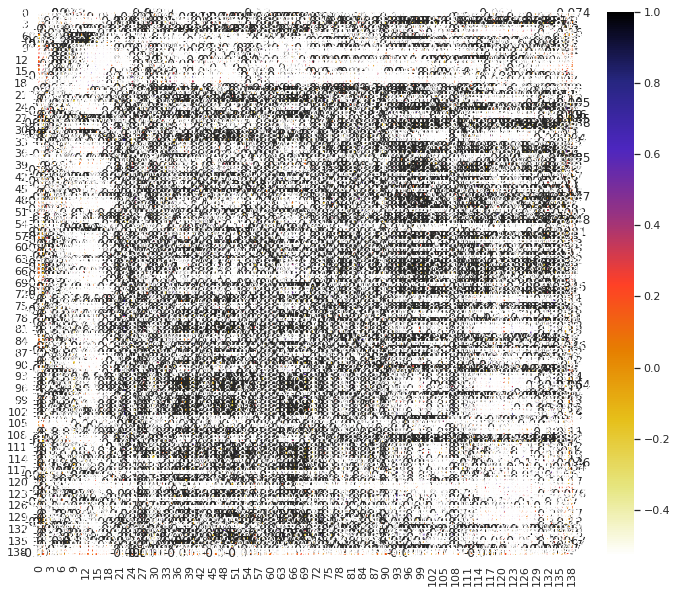

In [27]:
plt.figure(figsize=(12,10))
cor = x1train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [28]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [64]:
corr_features = correlation(x1train, 0.5)
len(set(corr_features))

113

In [69]:
corr_features

{7,
 8,
 10,
 13,
 15,
 16,
 17,
 18,
 19,
 22,
 24,
 25,
 26,
 29,
 30,
 32,
 33,
 34,
 35,
 36,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 47,
 48,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 116,
 117,
 119,
 120,
 122,
 123,
 124,
 125,
 126,
 128,
 129,
 130,
 132,
 133,
 134,
 135,
 136,
 137}

In [70]:
k=x1train.drop(corr_features,axis=1)
x1test=pd.DataFrame(x1_test)
k1=x1test.drop(corr_features,axis=1)
#For the model to be stable enough, the above variance should be low. 
#If the variance of the weights is high, it means that the model is very sensitive to data. 
#The weights differ largely with training data if the variance is high. It means that the model might not perform well with test data.
#reference: https://towardsdatascience.com/why-exclude-highly-correlated-features-when-building-regression-model-34d77a90ea8e#:~:text=For%20the%20model%20to%20be,if%20the%20variance%20is%20high.


In [71]:
model1.fit(k,Y1_train)
r_featured=model1.score(k1,Y1_test)
r_featured

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7199148029818956

In [73]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler=StandardScaler()
scaler.fit(k)
#input_d=[]
input_d=[0,1,1,0,1,1,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,1,1,1,1,1]
# above,this input is for threshold=0.6 likewise if we take th=0.5, we need array 26 elements
#th=0.6-->70%, th=0.5-->72%
#for i in range(0,26):
#  input_d.append(1)

input_d_np=np.asarray(input_d)
input_d_reshaped = input_d_np.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_d_reshaped)
#print(std_data)
prediction = model1.predict(std_data)
print(prediction)

['inactive']
